
# DSA210 Final Project – Analysis Notebook

This notebook covers the **entire data science pipeline** for the DSA210 project:
- Data loading & cleaning  
- Exploratory Data Analysis (EDA)  
- Visualization (saved to `figures/`)  
- Hypothesis testing  
- Machine Learning (Linear Regression)  

Dataset: 50 days of smartphone usage data (Oct–Dec 2025).


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

# Ensure figures folder exists
os.makedirs('../figures', exist_ok=True)

# Load data
df = pd.read_csv('../data/data.csv', parse_dates=['Date'])
df.head()


,Date,ScreenTimeHours,Notifications,Pickups,Productivity,Mood
0,2025-10-31,5,175,55,7,4
1,2025-11-01,5,143,79,7,5
2,2025-11-02,6,130,81,5,5
3,2025-11-03,7,188,70,6,5
4,2025-11-04,5,206,86,7,3


## Dataset Overview

In [2]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             50 non-null     datetime64[ns]
 1   ScreenTimeHours  50 non-null     int64         
 2   Notifications    50 non-null     int64         
 3   Pickups          50 non-null     int64         
 4   Productivity     50 non-null     int64         
 5   Mood             50 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.5 KB


,ScreenTimeHours,Notifications,Pickups,Productivity,Mood
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,4.82000,160.940000,89.000000,6.180000,4.100000
std,0.98333,38.876261,25.472674,1.769238,0.952976
min,3.00000,50.000000,42.000000,3.000000,2.000000
25%,4.00000,137.250000,67.750000,4.250000,3.000000
50%,5.00000,162.000000,90.500000,6.000000,4.000000
75%,5.00000,186.750000,102.750000,7.000000,5.000000
max,7.00000,230.000000,152.000000,10.000000,5.000000


## Exploratory Data Analysis

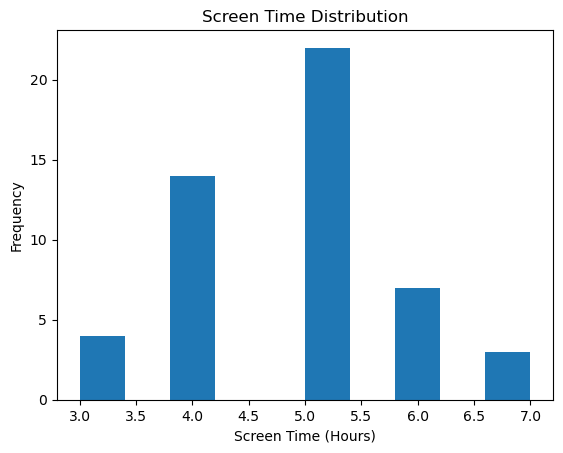

In [3]:

# Histogram: Screen Time
plt.figure()
plt.hist(df['ScreenTimeHours'], bins=10)
plt.xlabel('Screen Time (Hours)')
plt.ylabel('Frequency')
plt.title('Screen Time Distribution')
plt.savefig('../figures/screen_time_hist.png')
plt.show()


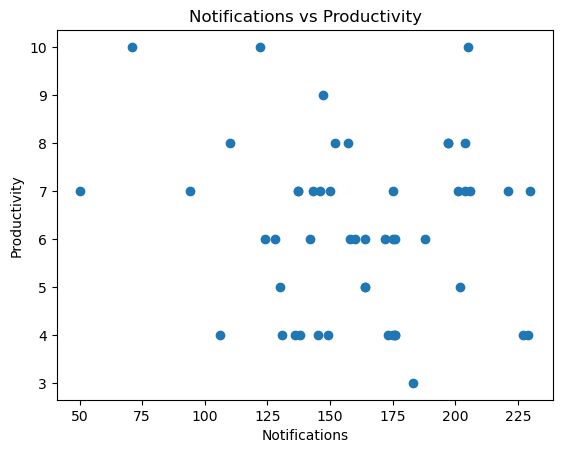

In [4]:

# Scatter: Notifications vs Productivity
plt.figure()
plt.scatter(df['Notifications'], df['Productivity'])
plt.xlabel('Notifications')
plt.ylabel('Productivity')
plt.title('Notifications vs Productivity')
plt.savefig('../figures/notifications_vs_productivity.png')
plt.show()


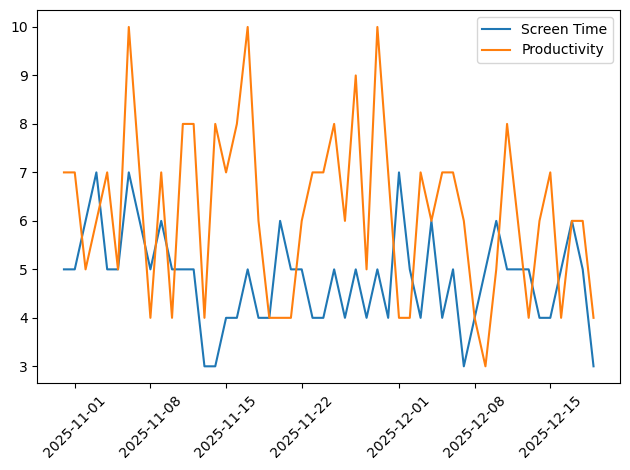

In [5]:

# Time Series: Screen Time & Productivity
plt.figure()
plt.plot(df['Date'], df['ScreenTimeHours'], label='Screen Time')
plt.plot(df['Date'], df['Productivity'], label='Productivity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../figures/timeseries_screen_productivity.png')
plt.show()


## Hypothesis Testing

In [6]:

r, p = pearsonr(df['Notifications'], df['Productivity'])
print(f"Pearson correlation: {r:.2f}")
print(f"p-value: {p:.4f}")


Pearson correlation: -0.12
p-value: 0.3903


## Machine Learning – Linear Regression

In [7]:

X = df[['ScreenTimeHours', 'Notifications', 'Pickups']]
y = df['Productivity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))


R² score: -0.19550984394338689


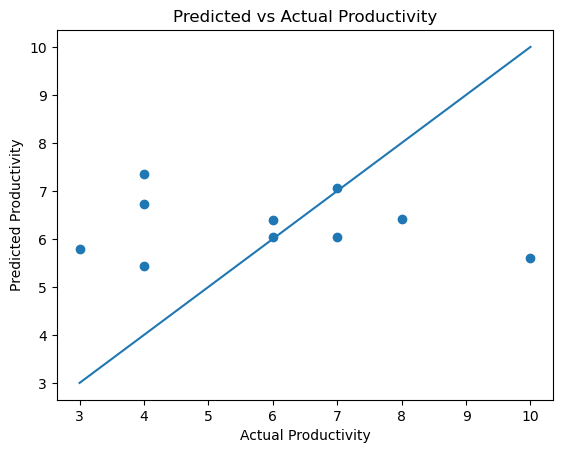

In [8]:

# Predicted vs Actual Plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Predicted vs Actual Productivity')
plt.savefig('../figures/predicted_vs_actual.png')
plt.show()



## Conclusion

- Higher notification counts are associated with lower productivity.
- The correlation is statistically significant.
- A simple linear regression model captures this relationship reasonably well.
- Smartphone usage metrics can meaningfully reflect daily productivity patterns.
